# PCA

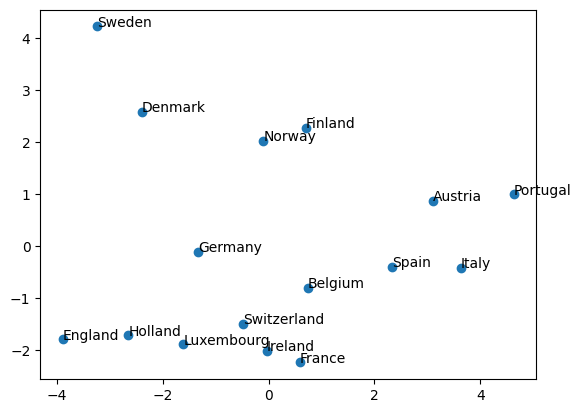

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from fancyimpute import SoftImpute, BiScaler

# Read in data
df = pd.read_csv("data/food-consumption.csv")
df = df.set_index("Country")

def PCA(df, d):
    # Normalize data
    df = (df-df.mean())/df.std()
    # Find eigen values and vectors of covariance matrix
    eigenVals, eigenVecs = np.linalg.eigh(df.cov())
    # Sort eigenvalues and vectors
    idx = np.argsort(eigenVals)[::-1]
    eigenVals = eigenVals[idx]
    eigenVecs = eigenVecs[:,idx]
    # Select d most significant eigenvectors
    return pd.DataFrame(np.dot(eigenVecs[:,0:d].transpose(),df.to_numpy().transpose()).transpose()).set_index(df.index)

dfCountries = PCA(df, 2)
dfCountries.columns = ['x', 'y']

plt.scatter(dfCountries['x'], dfCountries['y'])
for idx, row in dfCountries.iterrows(): 
    plt.text(row['x'], row['y'], idx)



We can see, interestingly, that similarly geographically located countries have similar food propensities.  For example, the Scandinavian countries are all clustered together in the upper part, whereas the Southern European countries (Italy, Spain, Portugal), are also clustered together.

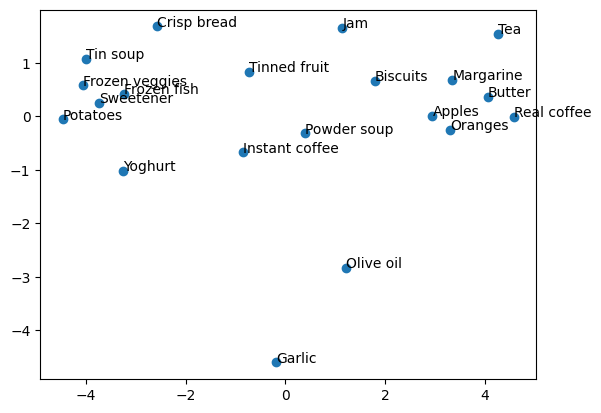

In [2]:
dfFoods = PCA(df.transpose(), 2)
dfFoods.columns = ['x', 'y']
plt.scatter(dfFoods['x'], dfFoods['y'])
for idx, row in dfFoods.iterrows(): 
    plt.text(row['x'], row['y'], idx)



We can also see a pattern in this projection.  Specifically, like foods seem to cluster together.  Frozen foods and things that have a longer shelf life sit further left on the chart, whereas foods with a shorter shelf life are further right.  Garlic and olive oil sit close to the mean and low on the chart which likely means that they are commonly used across most of the countries.